# 이미지 처리 기초

## 색 공간

#### 그레이스케일

In [2]:
import scipy.misc

img_gray = scipy.misc.face(gray=True)
img_gray.shape

(768, 1024)

In [10]:
# 한글 처리
import matplotlib as mpl
import matplotlib.pylab as plt
%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10

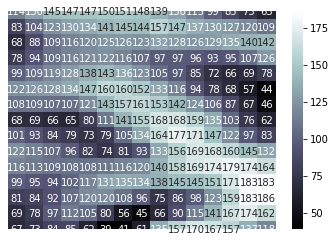

In [6]:

import seaborn as sns

sns.heatmap(img_gray[:15, :15], annot=True, fmt="d", cmap=plt.cm.bone)
plt.axis("off")
plt.show()

#### RGB

In [8]:
from sklearn.datasets import load_sample_images

dataset = load_sample_images()   
img_rgb = dataset.images[1]
img_rgb.shape

(427, 640, 3)

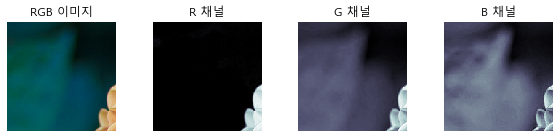

In [13]:
plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB 이미지")

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R 채널")

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G 채널")

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B 채널")

plt.show() 

#### HSV(Hue, Saturation, Value)
- 색상(Hue): 색상값 H는 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을 때의 각도이다. 0°~360°의 범위를 갖고 360°와 0°는 빨강을 가리킨다.
- 채도(Saturation): 채도값 S는 특정한 색상의 진함의 정도를 나타낸다. 가장 진한 상태를 100%이고 0%는 같은 명도의 무채색이다.
- 명도(Value): 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고 검은색은 0%이다.

In [15]:
import numpy as np
from matplotlib.colors import hsv_to_rgb

V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S * 1.0, V))
RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S * 0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape

(100, 360, 3)

In [16]:
# 색상(Hue)
HSV_S20[:4, :5, 0] 

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [17]:
# 채도(Saturation)
HSV_S20[:4, :5, 1] 

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [18]:
# 명도(Value)
HSV_S20[:4, :5, 2] 

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

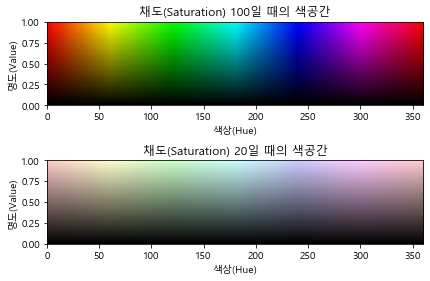

In [19]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 100일 때의 색공간")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 20일 때의 색공간")
plt.grid(False)

plt.tight_layout()
plt.show() 

## 이미지 파일 형식

## Pillow를 이용한 이미지 처리

In [20]:
import PIL
PIL.__version__

'7.1.1'

#### 이미지 읽고 쓰기

In [21]:
from PIL import Image

img_logo_png = Image.open("./logo.png")
img_logo_png.size

(601, 203)

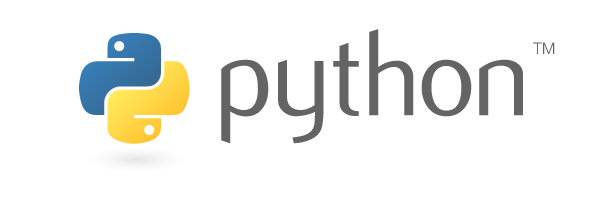

In [22]:
img_logo_png

In [23]:
img_logo_png.save("./logo.bmp")
img_logo_bmp = Image.open("./logo.bmp") 

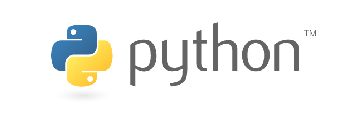

In [24]:
img_logo_array = np.array(img_logo_bmp)

plt.imshow(img_logo_array)
plt.axis("off")
plt.show() 

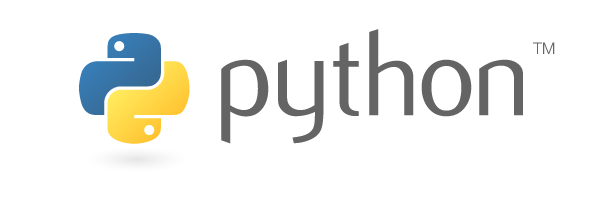

In [25]:
Image.fromarray(img_logo_array) 

#### 이미지 크기 변환

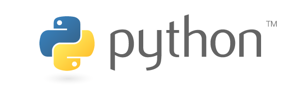

In [27]:
img_logo_png2 = img_logo_png.resize((300, 100))
img_logo_png2

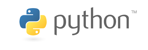

In [28]:
img_logo_thumbnail = img_logo_png.copy()
img_logo_thumbnail.thumbnail((150, 50))
img_logo_thumbnail

#### 이미지 회전

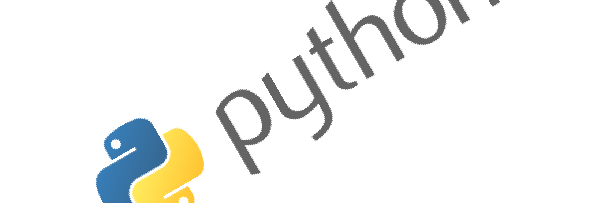

In [29]:
img_logo_rotated = img_logo_png.rotate(30)
img_logo_rotated

#### 이미지 잘라내기

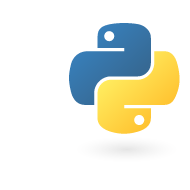

In [30]:
img_logo_cropped = img_logo_png.crop((10, 10, 200, 200))
img_logo_cropped

## Scikit-Image

In [32]:
import skimage
skimage.__version__

'0.16.2'

#### 샘플 이미지

In [37]:
import skimage.data

img_astro = skimage.data.astronaut()
#img_astro.shape

AttributeError: 'NoneType' object has no attribute 'read'

## OpenCV

In [39]:
import cv2
cv2.__version__

'4.2.0'

#### 파일 읽고 쓰기

In [40]:
img_astro3 = cv2.imread("./astronaut.png")
img_astro3.shape

(707, 335, 3)

In [41]:
# 각 채널을 분리
b, g, r = cv2.split(img_astro3)

# b, r을 서로 바꿔서 Merge
img_astro3_rgb = cv2.merge([r, g, b]) 

In [42]:
img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY) 

In [43]:
cv2.imwrite("./gray_astronaut.png", img_astro3_gray) 

True

#### 이미지 크기 변환

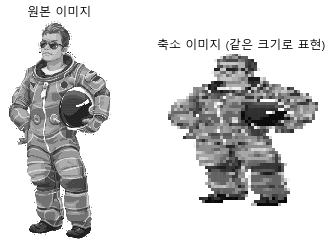

In [45]:
img_astro3_gray_resized = cv2.resize(img_astro3_gray, dsize=(50, 50))
img_astro3_gray_resized.shape

plt.subplot(121)
plt.imshow(img_astro3_gray, cmap=plt.cm.gray)
plt.title("원본 이미지")
plt.axis("off")

plt.subplot(122)
plt.imshow(img_astro3_gray_resized, cmap=plt.cm.gray)
plt.title("축소 이미지 (같은 크기로 표현)")
plt.axis("off")

plt.show() 